# COGS 108 - Final Project 

# Overview

With the amount of cars on the road, factories producing large quantities of goods, and a myriad of other things that we as humans do to contribute to air pollution it is imperative to ask what effects might the polluted air have on us? In this project we have narrowed our focus toward Asthma as it is one of the most common respiratory diseases (4). Through data analysis and application of data science practices we will investigate the possibility of a causal link between asthma and air pollution.


# Names

- Asia Esmael
- Harsimran Singh
- Luz Acevedo
- Jake Song
- Kimiya Ataiyan

# Research Question

Does the air pollution in LA cause asthma cases (respiratory disease) to increase?

## Background and Prior Work

Los Angeles is ranked amongst the worst in the country in regard to air pollution(1). About 43.3% of the American population lives in counties with unhealthy ozone and/or particle pollution levels,and one of our team members is part of this population, which is why this topic is important to us(1). The rest of our team members also live in close proximity to Los Angeles, which adds more importance to the topic. Since we all regularly use our cars it makes us a contributor to the externalized cost of air pollution, and looking into this topic will reconsider lifestyle decisions. There has also been an increase in respiratory diseases in California over the past years, leading to many death cases(2). This is also an important part of our topic since one of our group members has recently experience lung issues with short breath problems.


References (include links):
- 1) Air Pollution Increase in LA: https://www.latimes.com/local/lanow/la-me-ln-los-angeles-air-ozone-pollution-20190424-story.html
- 2) Respiratory disease increase: https://www.scpr.org/news/2017/09/25/75894/breathing-la-air-may-increase-your-risk-of-kidney/
- 3) Car purchase increase: https://mashable.com/2016/01/05/record-auto-sales-sorry-volkswagen/
- 4) Most Common respiratory diseases: https://www.unitypoint.org/homecare/article.aspx?id=2448b930-1451-43e4-8634-c0c16707c749

# Hypothesis

Our main hypothesis is that we believe that the higher air pollution levels cause an increase in Asthma in Los Angeles. The pollution in Los Angeles, according to our background research is quite high and we believe this correlates with Asthma cases increasing.

# Analytical Approach

We will be taking a descriptive approach in this analysis because, our goal is to show the relationship between air pollution and asthma

# Dataset(s)

- Dataset Name: AirLA.csv
- Dataframe Name: df_air
- Years: 2014, 2017
- Link to the dataset: https://usc.data.socrata.com/Los-Angeles/Air-Quality-LA-/bhyw-mxf5
- Number of observations: 4685
- Description: Contains PM2.5 concentration count for neighborhoods in LA county. Each neighborhood has a census tract, coordinates, and a corresponding name. 


- Dataset Name: AirLA2.csv
- Dataframe Name: df_air_neigh
- Years: 2015
- Link to the dataset: https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report
- Number of observations: 366
- Description: Contains PM2.5 AQI value and AQI Category for neighborhoods Los Angeles county.


- Dataset Name: AirQualityCounty.csv
- Dataframe Name: df_air_county
- Years: 2015
- Link to the dataset: https://aqs.epa.gov/aqsweb/airdata/download_files.html
- Number of observations: 1062 (restricted to 54 in our dataset for each California county)
- Description: Contains list of counties in the United States with their respective number of days where the AQI value was considered good, moderate, unhealthy for sensitive groups, unhealthy, very unhealthy, and hazardous. It also includes the list of days where the main pollutant was CO, NO2, Ozone, SO2, PM2.5, and PM10. There are also columns for the max AQI value, 90th percentile AQI, and median AQI. 


- Dataset Name: AsthmaCounty.xlsx
- Dataframe Name: df_asthma_county
- Years: 2015-2016
- Link to the dataset: https://healthdata.gov/dataset/asthma-prevalence
- Number of observations: 414 
- Description: Prevalence of Asthma in counties in California separated by age groups. 


- Dataset Name: AsthmaLA.xlsx
- Dataframe Name: df_asthma
- Years: 2014, 2017
- Link to the dataset: https://usc.data.socrata.com/Los-Angeles/Asthma-LA-/e2zr-cxm5
- Number of observations: 4684 
- Description: Contains number of asthma-related ER visits by the neighborhoods in LA county. 


- Dataset Name: Income__LA.csv
- Dataframe Name: df_income
- Years: 2010-2016
- Link to the dataset: https://usc.data.socrata.com/Los-Angeles/Income-LA-/kygc-fzgm  
- Number of observations: 16400 
- Description: Contains estimated median income for each region in Los Angeles. 


# Setup

In [1]:
import pandas as pd
import seaborn as sns
import patsy
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import matplotlib.pyplot as plt
import pandas as pd 
import folium
from folium.plugins import HeatMap


df_air = pd.read_csv('AirLA.csv')
df_air_neigh = pd.read_csv('AirLA2.csv')
df_air_county = pd.read_csv('AirQualityCounty.csv')

df_asthma_county = pd.read_excel('AsthmaCounty.xlsx')
df_asthma = pd.read_csv('AsthmaLA.csv')
df_income = pd.read_csv('Income__LA.csv')

In [2]:
df_asthma_county
df_income.shape

(16400, 12)

# Data Cleaning

First we want to see if there are any missing values for each data set that we have

In [3]:
df_air_county.isnull().any()
df_air.isnull().any()
df_air_neigh.isnull().any()
df_asthma_county.isnull().any()
df_asthma.isnull().any()
df_income.isnull().any()

Policy Area     False
Dataset         False
Variable        False
Year            False
Amount           True
Tract           False
Tract Number    False
Neighborhood    False
GEOID           False
Location        False
Row ID          False
Date            False
dtype: bool

Since we know that some dataframes have missing values, we want to look at the rows which have missing values in order to determine whether we want to drop them or not.

In [4]:
df_air[df_air.isnull().any(axis=1)]
df_income[df_income.isnull().any(axis = 1)]

,Policy Area,Dataset,Variable,Year,Amount,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
28,Employment & Income,Income,Median Household Income,2014,NaN,"Census Tract 5041.02, Los Angeles County, Cali...",504102,Norwalk,1400000US06037504102,"(33.8999125, -118.0464285)",Median_Household_Income_2014_1400000US06037504102,01/01/2014
45,Employment & Income,Income,Median Household Income,2011,NaN,"Census Tract 5747, Los Angeles County, California",574700,Long Beach,1400000US06037574700,"(33.778316, -118.118802)",Median_Household_Income_2011_1400000US06037574700,01/01/2011
47,Employment & Income,Income,Median Household Income,2014,NaN,"Census Tract 9800.09, Los Angeles County, Cali...",980009,Griffith Park,1400000US06037980009,"(34.136859, -118.3012315)",Median_Household_Income_2014_1400000US06037980009,01/01/2014
101,Employment & Income,Income,Median Household Income,2016,NaN,"Census Tract 9800.03, Los Angeles County, Cali...",980003,Northeast Antelope Valley,1400000US06037980003,"(34.7929935, -117.957417)",Median_Household_Income_2016_1400000US06037980003,01/01/2016
116,Employment & Income,Income,Median Household Income,2015,NaN,"Census Tract 4024.04, Los Angeles County, Cali...",402404,Pomona,1400000US06037402404,"(34.052917, -117.81575)",Median_Household_Income_2015_1400000US06037402404,01/01/2015
...,...,...,...,...,...,...,...,...,...,...,...,...
16140,Employment & Income,Income,Median Household Income,2012,NaN,"Census Tract 5746.01, Los Angeles County, Cali...",574601,Long Beach,1400000US06037574601,"(33.781883, -118.1157115)",Median_Household_Income_2012_1400000US06037574601,01/01/2012
16171,Employment & Income,Income,Median Household Income,2015,NaN,"Census Tract 9800.14, Los Angeles County, Cali...",980014,Wilmington,1400000US06037980014,"(33.7950245, -118.240815)",Median_Household_Income_2015_1400000US06037980014,01/01/2015
16207,Employment & Income,Income,Median Household Income,2014,NaN,"Census Tract 9800.31, Los Angeles County, Cali...",980031,San Pedro,1400000US06037980031,"(33.73751, -118.2614255)",Median_Household_Income_2014_1400000US06037980031,01/01/2014
16346,Employment & Income,Income,Median Household Income,2016,NaN,"Census Tract 9010.03, Los Angeles County, Cali...",901003,Lancaster,1400000US06037901003,"(34.69674, -118.227897)",Median_Household_Income_2016_1400000US06037901003,01/01/2016


df_air has null values in rows for cities such as Avalon and Catalina Island. Since our main area we are looking at is LA County on main land, we decided to drop these values since catalina Island is not our main target area.
df_income had 222 rows of null values for their income amount column. The reason we dropped them is because those values are not relevant for us to dig deeper into this dataset. The dataset also provides us with 16400 rows which provides us with much more data to rely on.

In [5]:
df_air = df_air.dropna()
df_asthma = df_asthma.dropna()
df_income= df_income.dropna()
#Only using 2014 for income because thats the only year matching with other datasets
df_income = df_income[df_income['Year'] == 2014]

In [6]:
print(df_air['Policy Area'].value_counts())
print(df_asthma['Policy Area'].value_counts())
print(df_air['Variable'].value_counts())
print(df_asthma['Variable'].value_counts())
print(df_air['Year'].value_counts())
print(df_asthma['Year'].value_counts())
print(df_air['Date'].value_counts())
print(df_asthma['Date'].value_counts())
#df_income.columns

Environment    4681
Name: Policy Area, dtype: int64
Health    4684
Name: Policy Area, dtype: int64
PM2.5 Concentration    4681
Name: Variable, dtype: int64
Asthma-Related ER Visits    4684
Name: Variable, dtype: int64
2017    2341
2014    2340
Name: Year, dtype: int64
2014    2342
2017    2342
Name: Year, dtype: int64
1/1/17    2341
1/1/14    2340
Name: Date, dtype: int64
1/1/17    2342
1/1/14    2342
Name: Date, dtype: int64


Some of our datasets did not have clear column names, so for the sake of clarity we renamed them.

In [7]:
df_air = df_air.rename(columns = {'Count':'PM2.5_Val'})
df_air_neigh = df_air_neigh.rename(columns = {'Site Name': 'Neighborhood'}) 
df_asthma_county = df_asthma_county.rename(columns = {'COUNTY': 'County'})

# Data Analysis & Results

We started our data analysis by exploring the datasets for specific values and outliers.

In [8]:
df_income.head()

,Policy Area,Dataset,Variable,Year,Amount,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
4,Employment & Income,Income,Median Household Income,2014,21369.0,"Census Tract 1904.02, Los Angeles County, Cali...",190402,Los Feliz,1400000US06037190402,"(34.103557, -118.307149)",Median_Household_Income_2014_1400000US06037190402,01/01/2014
18,Employment & Income,Income,Median Household Income,2014,63750.0,"Census Tract 2751.01, Los Angeles County, Cali...",275101,Del Rey,1400000US06037275101,"(33.99916, -118.4045585)",Median_Household_Income_2014_1400000US06037275101,01/01/2014
21,Employment & Income,Income,Median Household Income,2014,81375.0,"Census Tract 9102.05, Los Angeles County, Cali...",910205,Southeast Antelope Valley,1400000US06037910205,"(34.530174, -118.1365825)",Median_Household_Income_2014_1400000US06037910205,01/01/2014
23,Employment & Income,Income,Median Household Income,2014,91130.0,"Census Tract 1131.01, Los Angeles County, Cali...",113101,Chatsworth,1400000US06037113101,"(34.265338, -118.5882575)",Median_Household_Income_2014_1400000US06037113101,01/01/2014
24,Employment & Income,Income,Median Household Income,2014,83608.0,"Census Tract 7009.01, Los Angeles County, Cali...",700901,Pico-Robertson,1400000US06037700901,"(34.0620675, -118.3809415)",Median_Household_Income_2014_1400000US06037700901,01/01/2014


In [9]:
df_air_county[df_air_county['County'] == 'El Dorado']

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
8,California,El Dorado,2015,365,239,102,22,2,0,0,166,93,44,0,0,350,0,5,10


We merge our df_asthma_county and df_air_county so that we can use this to plot each asthma count and PM2.5 Value days per city in LA County. 
We do this so we can see the relation of cities to one another, and see which ones particularly stand out with high PM2.5 Value days and high Asthma Counts.
Then looking at both plots we can see if the cities with the highest count of PM2.5 Value days also has the highest asthma prevalence.

Text(0.5, 1.0, 'Number of days of siginificant PM2.5 Value by County')

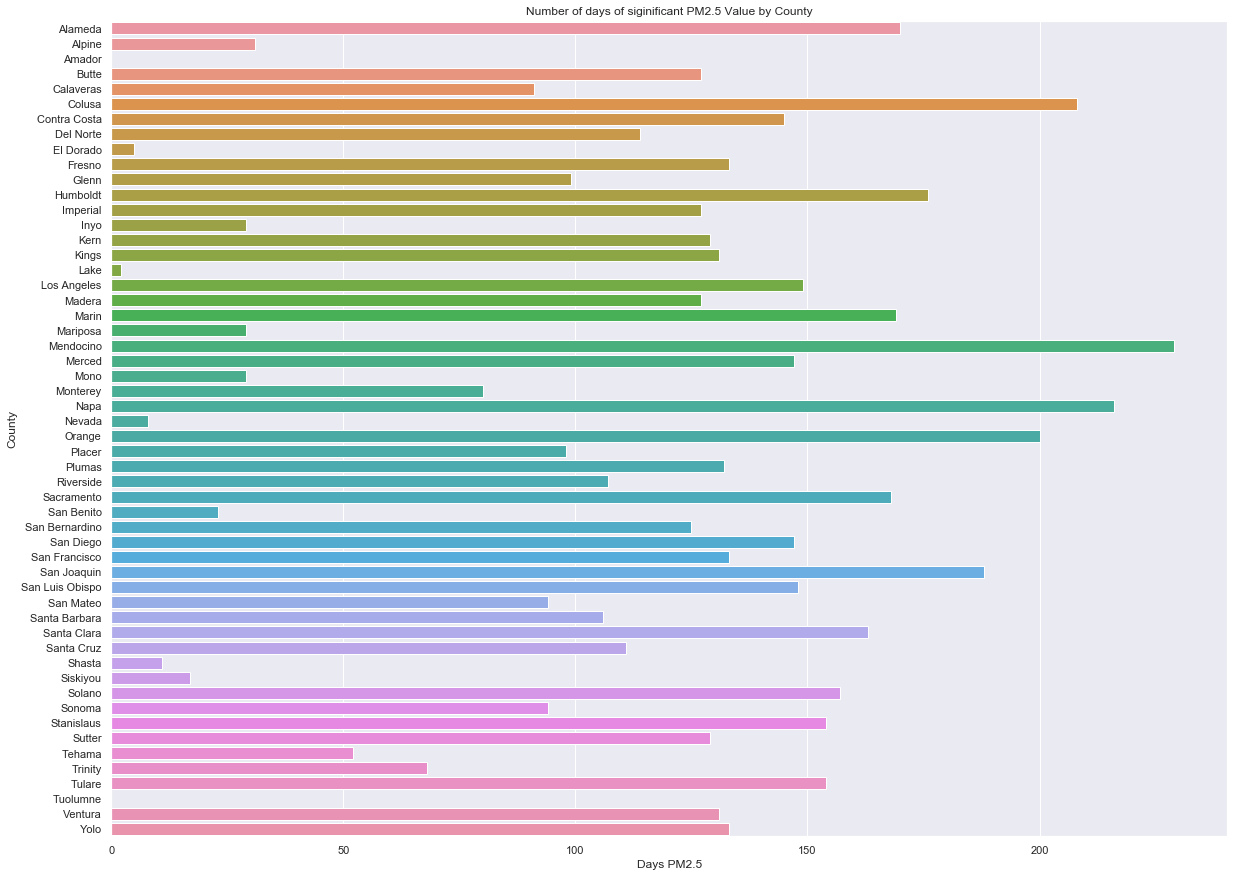

In [10]:
df_merged_county = pd.merge(df_asthma_county, df_air_county, how='inner', on=['County'])
sns.set(font_scale= 0.01)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x="Days PM2.5", y= "County", data=df_merged_county, ci = None).set_title("Number of days of siginificant PM2.5 Value by County")


Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.
As you can see, there are counties such as El Dorado that have a PM2.5 value of 0. This means that there has been 0 recorded number of days where PM2.5 was not the main pollutant.

Mendocino has the most amount of days where PM2.5 was the main pollutant, closely followed by Colusa. Mendocino and Colusa are in northern California.

Text(0.5, 1.0, 'Asthma Prevalence by County')

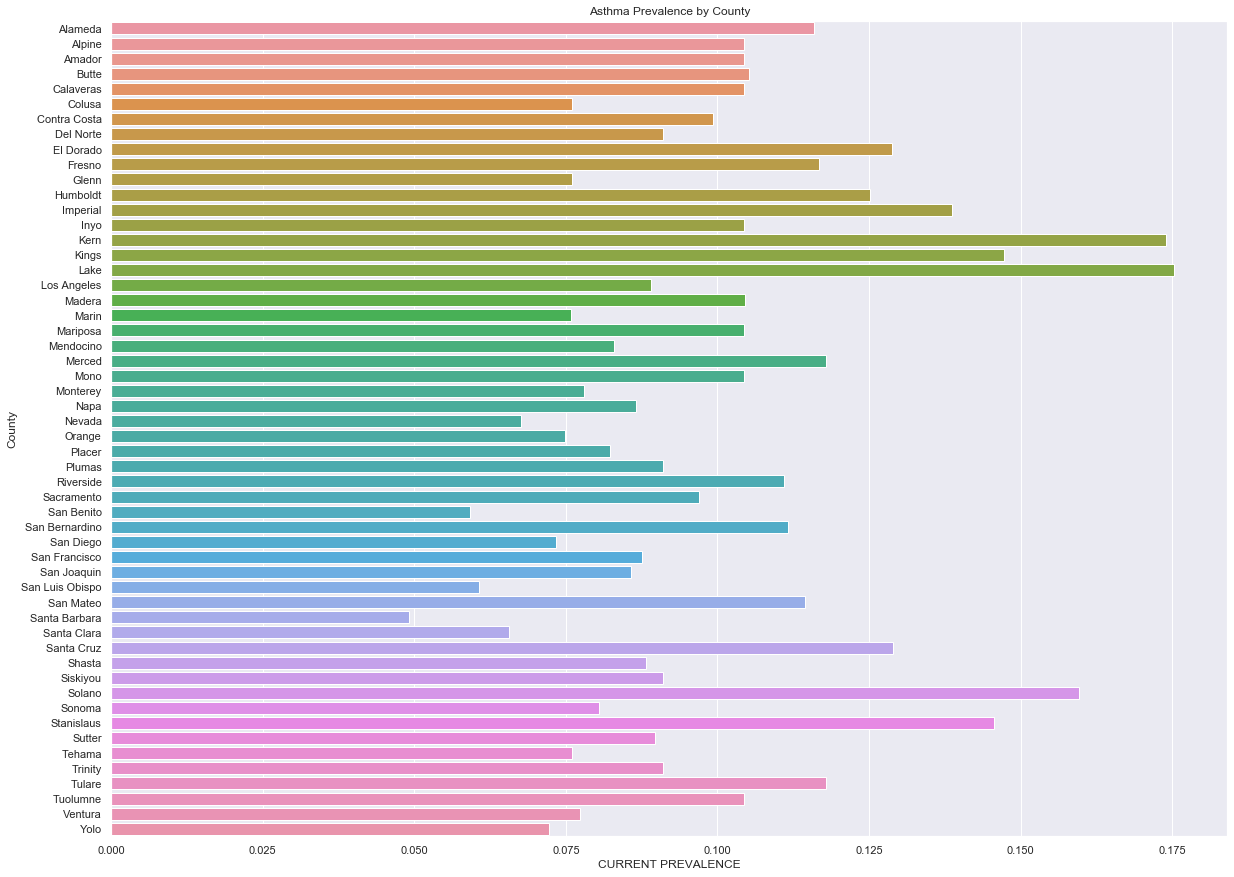

In [11]:
sns.barplot(x="CURRENT PREVALENCE", y= "County", data=df_merged_county, ci = None).set_title("Asthma Prevalence by County")

Above we can see the current prevalence of asthma for each county in our data set. 
Lake and Kern have the highest values. Lake is also in Northern California (near Sacramento) and Kern is in Southern California (near Bakersfield).
Los Angeles has about half the value of what these 2 cities have for current prevalence of asthma.

Next we want to look at the count for "Unhealthy for Sensitive Groups Days" in each city, since we want to look at the extreme days were the PM2.5 Value was very high.

Text(0.5, 1.0, 'Unhealthy Days for Sensitive Groups by County')

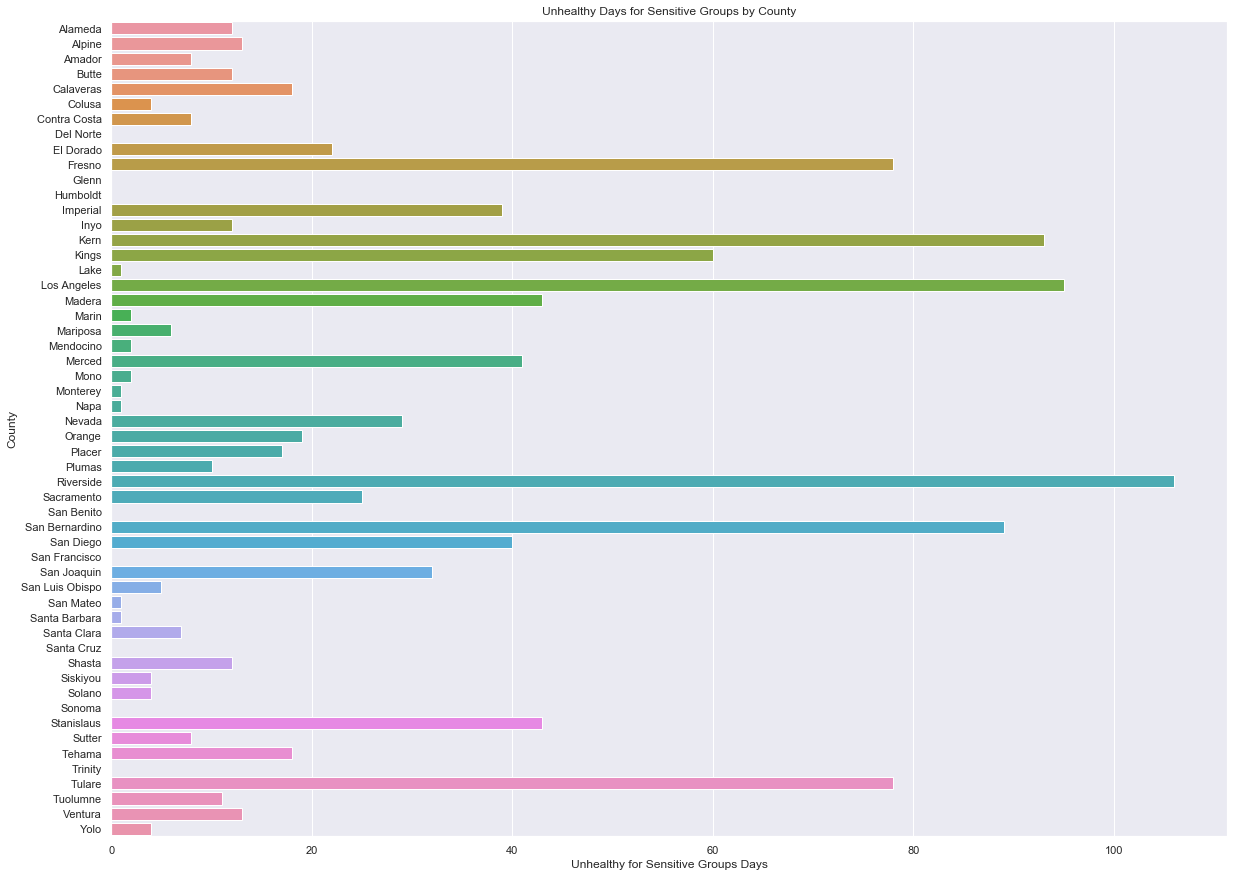

In [12]:
#Barplot to show Unhealthy days by county 
sns.barplot(x="Unhealthy for Sensitive Groups Days", y= "County", data=df_merged_county, ci = None).set_title("Unhealthy Days for Sensitive Groups by County")

Los Angeles, Riverside and Kern have the highest amount of unhealthy days for sensitive groups in a year. But from the previous plot we know that Los Angeles and Riverside did not have the highest prevalance of Asthma from all counties, meanwhile Kern was one of the counties with the highest current prevelance.

We took a look at the County datasets to see how Los Angeles values look compared to other counties in California.
LA had high values for Unhealthy Days for sensitive groups, but didnt seem to be one of the highest for both the Asthma Prevalence and PM2.5 Value days. 

Now we want to take a closer look at Los Angeles County. For that we use our three other data sets: df_air, df_asthma
and df_income.
We drop columns that are not relevant to our analysis, such as ROW ID and Date, since they have repetitive information.

In [13]:
#USC datasets 
df_air = df_air.drop(columns = ['Row ID', 'Date', 'Dataset', 'Policy Area', 'Tract Number' , 'Tract', 'Variable'])
df_asthma = df_asthma.drop(columns = ['Row ID', 'Date', 'Dataset', 'Policy Area', 'Tract Number' , 'Tract', 'Variable'])
df_income = df_income.drop(columns = ['Row ID', 'Date', 'Dataset', 'Policy Area', 'Tract Number' , 'Tract', 'Variable'])


Using these three data sets, our aim is to create Heat Maps, which is why we need to split the coordinate columns format such that we have access to x-coord and y-coord seperately.

In [14]:
#Df_air
df_air[['xtemp', 'ytemp']] = df_air.Location.str.split(",",expand=True,)
df_air[['dropx', 'x-coord']] = df_air.xtemp.str.split("(",expand=True,)
df_air[['y-coord', 'dropy']] = df_air.ytemp.str.split(")",expand=True,)
df_air = df_air.drop(columns = ['xtemp', 'ytemp', 'dropx', 'dropy', 'Location'])
df_air.head()

#Df_asthma
df_asthma[['xtemp', 'ytemp']] = df_asthma.Location.str.split(",",expand=True,)
df_asthma[['dropx', 'x-coord']] = df_asthma.xtemp.str.split("(",expand=True,)
df_asthma[['y-coord', 'dropy']] = df_asthma.ytemp.str.split(")",expand=True,)
df_asthma = df_asthma.drop(columns = ['xtemp', 'ytemp', 'dropx', 'dropy', 'Location'])
df_asthma.head()

#Df_income
df_income[['xtemp', 'ytemp']] = df_income.Location.str.split(",",expand=True,)
df_income[['dropx', 'x-coord']] = df_income.xtemp.str.split("(",expand=True,)
df_income[['y-coord', 'dropy']] = df_income.ytemp.str.split(")",expand=True,)
df_income = df_income.drop(columns = ['xtemp', 'ytemp', 'dropx', 'dropy', 'Location'])
df_income.head()

,Year,Amount,Neighborhood,GEOID,x-coord,y-coord
4,2014,21369.0,Los Feliz,1400000US06037190402,34.103557,-118.307149
18,2014,63750.0,Del Rey,1400000US06037275101,33.99916,-118.4045585
21,2014,81375.0,Southeast Antelope Valley,1400000US06037910205,34.530174,-118.1365825
23,2014,91130.0,Chatsworth,1400000US06037113101,34.265338,-118.5882575
24,2014,83608.0,Pico-Robertson,1400000US06037700901,34.0620675,-118.3809415


In [15]:
df_air = df_air.astype({"x-coord": float, "y-coord": float})
df_asthma = df_asthma.astype({"x-coord": float, "y-coord": float})
df_asthma.head()

,Year,Count,Neighborhood,GEOID,x-coord,y-coord
0,2014,45.040000,Mid-Wilshire,1400000US06037217200,34.049375,-118.341836
1,2014,32.530584,Palms,1400000US06037271701,34.026223,-118.419751
2,2014,46.623591,Mission Hills,1400000US06037109400,34.269881,-118.455282
3,2014,42.270000,El Monte,1400000US06037433401,34.059426,-118.042547
4,2014,110.062305,Willowbrook,1400000US06037540901,33.919847,-118.273685


We want to have an overview of the PM2.5 Value and Asthma Count in Los Angeles comparing 2014 recordings to 2017 recordings.

Text(0.5, 1.0, 'PM2.5 Value in LA for 2014 and 2017')

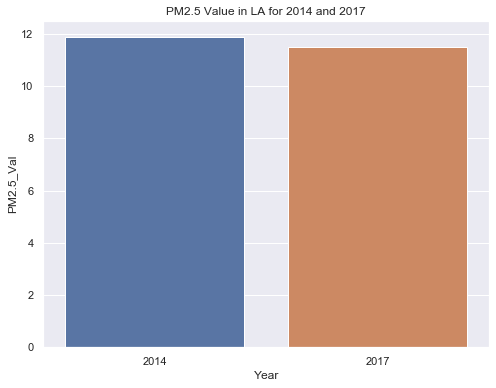

In [16]:
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x="Year", y= "PM2.5_Val", data=df_air, ci = None).set_title("PM2.5 Value in LA for 2014 and 2017")

Text(0.5, 1.0, 'Asthma Count in LA for 2014 and 2017')

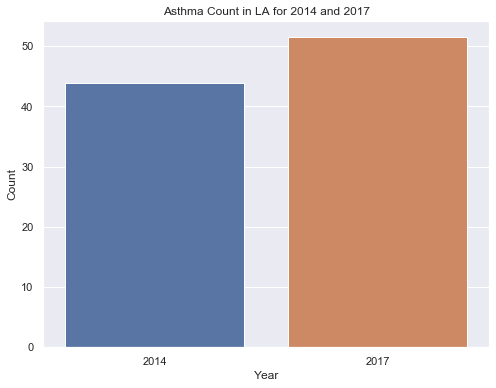

In [17]:
sns.barplot(x="Year", y= "Count", data=df_asthma, ci = None).set_title("Asthma Count in LA for 2014 and 2017")

Now we check for outliers in df_air and df_asthma focusing on 2014 and 2017 seperately.

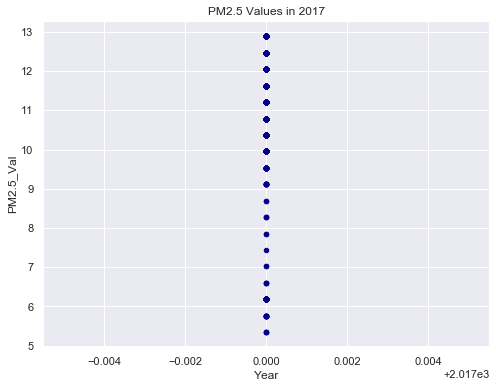

In [18]:
df_air_17 = df_air[df_air['Year'] == 2017]
df_air_17.plot.scatter(x= 'Year', y='PM2.5_Val', c='DarkBlue', title = 'PM2.5 Values in 2017')


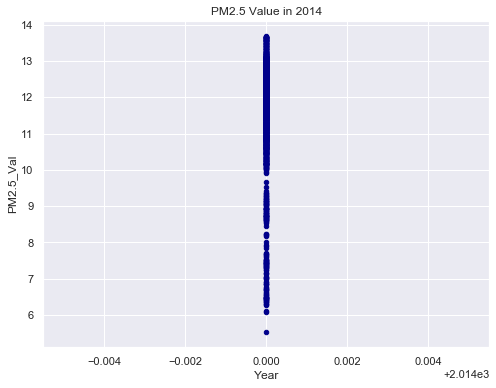

In [19]:
df_air_14 = df_air[df_air['Year'] == 2014]
df_air_14.plot.scatter(x= 'Year', y='PM2.5_Val', c='DarkBlue', title = 'PM2.5 Value in 2014') 

To be consistent with a common year shared in all other datasets we only look at 2014 data from here on.

In [20]:
# All the cells below should only use data from 2014 to be consistent with other datasets 
df_asthma = df_asthma[df_asthma['Year']==2014]
df_air = df_air[df_air['Year']==2014]

(5, 15)

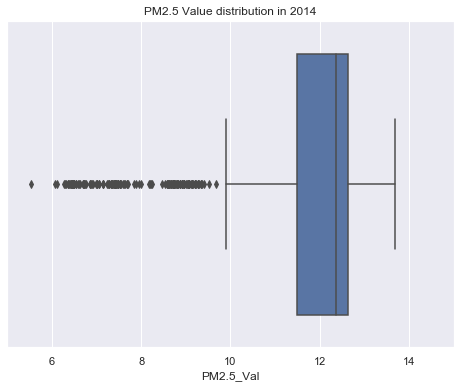

In [21]:
#df_air.plot.scatter(x='Year',  y='PM2.5_Val', c='DarkBlue')
ax = sns.boxplot(x=df_air['PM2.5_Val'])
ax.set_title('PM2.5 Value distribution in 2014')
ax.set_xlim(5,15)

Text(0.5, 1.0, 'Asthma Count distribution in 2014')

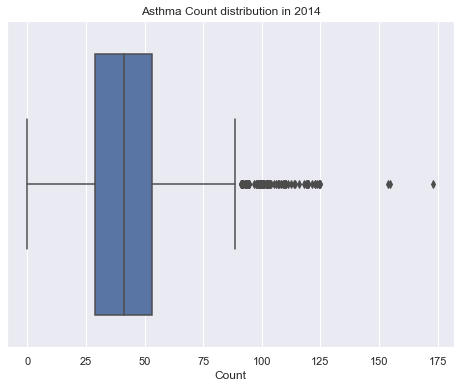

In [22]:
#df_asthma.plot.scatter(x='Year',  y='Count', c='red')
ax2 = sns.boxplot(x=df_asthma['Count'])
ax2.set_title('Asthma Count distribution in 2014')

From the above Boxplot we can see that the Asthma data frame contains a few outliers and PM2.5 Value contains one outlier that we now want to get rid of.

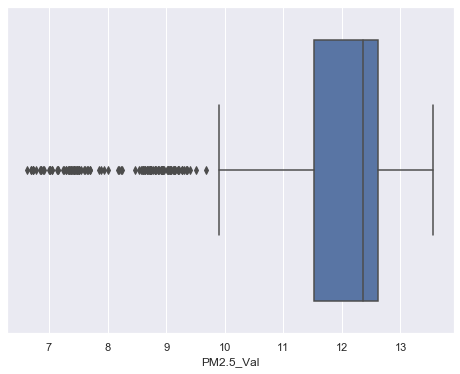

In [23]:
q = df_air['PM2.5_Val'].quantile(0.99)
df_air[df_air['PM2.5_Val'] < q]
q_low = df_air['PM2.5_Val'].quantile(0.01)
q_hi  = df_air['PM2.5_Val'].quantile(0.99)

df_air_filtered = df_air[(df_air['PM2.5_Val'] < q_hi) & (df_air['PM2.5_Val'] > q_low)]
sns.boxplot(x=df_air_filtered['PM2.5_Val'])

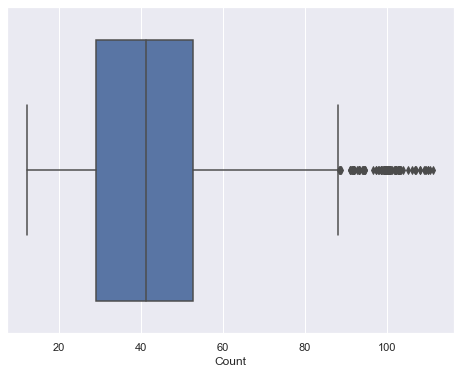

In [24]:
q = df_asthma['Count'].quantile(0.99)
df_asthma[df_asthma['Count'] < q]
q_low = df_asthma['Count'].quantile(0.01)
q_hi  = df_asthma['Count'].quantile(0.99)

df_asthma_filtered = df_asthma[(df_asthma['Count'] < q_hi) & (df_asthma['Count'] > q_low)]
sns.boxplot(x=df_asthma_filtered['Count'])

# Data Analysis

Our null hypothesis is that there is no signifcant relationship between the Air Quality and Asthma Cases in Los Angeles. We are only looking at data from 2014. 
We will use a p-value of 0.01.

In [25]:
h_asth = df_asthma_filtered['Count'].values
h_air = df_air_filtered['PM2.5_Val'].values
st_asth, p_asth = normaltest(h_asth)
st_air, p_air = normaltest(h_air)

#alpha signifance value of 0.01
print(st_air, p_air)
print(st_asth, p_asth)


1010.5876862855175 3.578262387382902e-220
356.39857465442867 4.064740593479031e-78


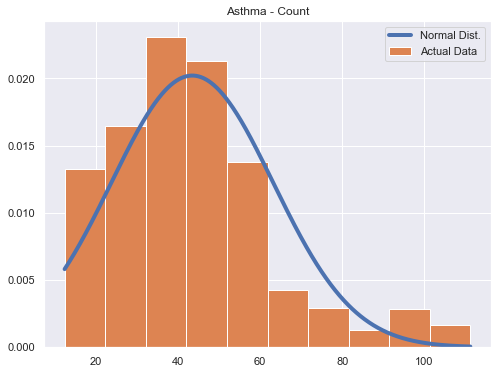

In [26]:
xs = np.arange(h_asth.min(), h_asth.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_asth), np.std(h_asth))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_asth, density = True, label = 'Actual Data');
plt.title('Asthma - Count')
plt.legend();

We wanted to determine if our data was normally distributed. This graph is right skewed , meaning our mean is to the right of the median. 
The average of our count of visits to the Hospital for Asthma Cases is higher than the most common expected Count.

In [27]:
df_skew_neighborhoods_asth = df_asthma[df_asthma['Count']  > 80]
df_skew_neighborhoods_asth.tail()

,Year,Count,Neighborhood,GEOID,x-coord,y-coord
3706,2014,119.900000,Lancaster,1400000US06037900804,34.711309,-118.142751
3745,2014,91.926162,Lake Los Angeles,1400000US06037900103,34.631220,-117.845138
3957,2014,94.265053,Lancaster,1400000US06037900607,34.693862,-118.124286
4004,2014,93.080000,Lancaster,1400000US06037900507,34.678883,-118.085749
4012,2014,119.520324,Lancaster,1400000US06037900704,34.660387,-118.137914


In the cell above, we decided to analyze the neighborhoods that were causing skew in the Asthma dataset. As you can tell from the cell above, the neighborhoods with the highest counts of Asthma are Lancaster and Lake Los Angeles. 

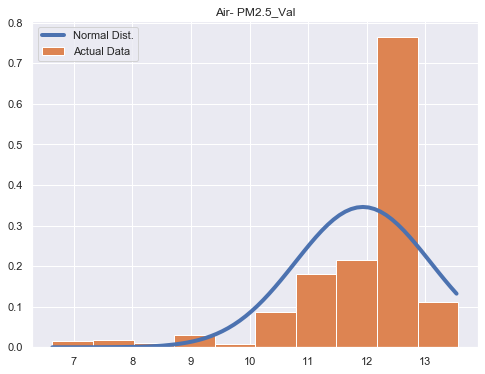

In [28]:
xs = np.arange(h_air.min(), h_air.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_air), np.std(h_air))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_air, density = True, label = 'Actual Data');
plt.title('Air- PM2.5_Val')
plt.legend();

This graph is left skewed meaning that the mean is to the left of the median. 
The average of our PM2.5 Value is less than the most common PM2.5 Value. In addition, it is noticeable that the majority of the PM2.5 values are between 12 and 13. It is clear that the PM2.5 value dataset is not normally distributed.  

In [29]:
df_merged = df_asthma_filtered.merge(df_air, on='GEOID')
df_merged = df_merged.rename(columns = {'PM2.5_Val' : 'PMVal'})
df_merged = df_merged.drop(columns = ['Neighborhood_y'])
df_merged = df_merged.rename(columns = {'Neighborhood_x': 'Neighborhood'})
df_merged = pd.merge(df_merged, df_income, how='inner', on=['Neighborhood'])
df_merged = df_merged.rename(columns = {'Amount': 'Income'})
df_merged = df_merged.rename(columns = {'Count': 'AsthmaVisits'})
df_skew_neighborhoods_air = df_merged[df_merged['PMVal'] < 9]
df_skew_neighborhoods_air = df_skew_neighborhoods_air.drop(columns = ['Year_x', 'Year_y', 'GEOID_x', 'x-coord_y', 'y-coord_x', 'x-coord_x', 'y-coord_y', 'GEOID_y'])


We decided to merge the Asthma and PM2.5 value datasets. In addition, we created a new dataframe called df_skew_neighborhoods_air to check for values causing skew in the PM2.5 value dataset. 

In [30]:
df_skew_neighborhoods_air.tail()

,AsthmaVisits,Neighborhood,PMVal,Year,Income,x-coord,y-coord
45433,20.400000,Castaic,8.542132,2014,136985.0,34.4642225,-118.6428175
45444,17.890142,Agua Dulce,8.198499,2014,81458.0,34.5149,-118.3077005
45445,32.886082,Leona Valley,7.323844,2014,100610.0,34.6249465,-118.305774
45464,26.039531,Elizabeth Lake,7.423030,2014,65074.0,34.6737525,-118.3836475
45465,91.926162,Lake Los Angeles,6.898359,2014,36282.0,34.6312205,-117.845138


As we can see from the cell above, many of the PM2.5 values less than 9, contain very similar PM2.5 values. They also vary in terms of Asthma visits, listed under the "AsthmaVisits" column, and incomes listed under the "Income" column. 

In [31]:
avg_h_asth = h_asth.mean()
avg_h_air = h_air.mean()
max_h_asth = h_asth.max()
max_h_air = h_air.max()
print('Average count of Asthma  is \t\t\t {:2.2f}'.format(avg_h_asth))
print('Average  PM2.5 value of Air Quality is \t\t {:2.2f}'.format(avg_h_air))
print('Max count of Asthma  is \t\t\t {:2.2f}'.format(max_h_asth))
print('Max  PM2.5 value of Air Quality is \t\t {:2.2f}'.format(max_h_air))


Average count of Asthma  is 			 43.43
Average  PM2.5 value of Air Quality is 		 11.93
Max count of Asthma  is 			 111.31
Max  PM2.5 value of Air Quality is 		 13.56


In [32]:
#Combine PM values and asthma visit rates
df_air_pm = df_air.merge(df_asthma, on='x-coord')

In [33]:
df_air_pm = df_air_pm.drop(columns = ['Year_x', 'Neighborhood_y', 'y-coord_y', 'GEOID_y', 'Neighborhood_y'])
df_air_pm = df_air_pm.rename(columns = {'Year_y': 'Year'})
df_air_pm = df_air_pm.rename(columns = {'Neighborhood_x': 'Neighborhood'})
df_air_pm = df_air_pm.rename(columns = {'y-coord_x': 'y-coord'})
df_air_pm = df_air_pm.rename(columns = {'x-coord_x': 'x-coord'})
df_air_pm = df_air_pm.rename(columns = {'PM2.5_Val': 'PMVal'})
df_air_pm = df_air_pm.rename(columns = {'Count': 'AsthmaVisits'})
df_air_pm = df_air_pm.rename(columns = {'GEOID_x': 'GEOID'})

#Incorporate income into data
df_air_pm = df_air_pm.merge(df_income, on='GEOID')

In [34]:
df_air_pm = df_air_pm.drop(columns = ['Year_x', 'Neighborhood_y', 'x-coord_y', 'y-coord_y', 'GEOID', 'Neighborhood_y'])
df_air_pm = df_air_pm.rename(columns = {'Year_y': 'Year'})
df_air_pm = df_air_pm.rename(columns = {'Neighborhood_x': 'Neighborhood'})
df_air_pm = df_air_pm.rename(columns = {'y-coord_x': 'y-coord'})
df_air_pm = df_air_pm.rename(columns = {'x-coord_x': 'x-coord'})
df_air_pm = df_air_pm.rename(columns = {'Amount': 'Income'})
df_air_pm = df_air_pm.drop_duplicates(subset='x-coord')
df_air_pm = df_air_pm[df_air_pm['AsthmaVisits']>=1]

In [35]:
import shapely.geometry as shp
#Calculate geometry of points 
df_air_pm['Geometry'] = df_air_pm[['x-coord', 'y-coord']].apply(shp.Point, axis=1)

In [36]:
df_air_pm.head()

,PMVal,Neighborhood,x-coord,y-coord,AsthmaVisits,Year,Income,Geometry
0,11.040100,Tujunga,34.259555,-118.293602,38.770000,2014,49006.0,POINT (34.2595555 -118.293602)
1,10.953724,Tujunga,34.267357,-118.290240,38.159475,2014,116400.0,POINT (34.267357 -118.29024)
2,11.114240,Tujunga,34.251998,-118.292687,38.770000,2014,39430.0,POINT (34.251998 -118.2926875)
3,11.143084,Tujunga,34.251190,-118.281014,38.770000,2014,38750.0,POINT (34.2511895 -118.281014)
4,11.189527,Tujunga,34.245595,-118.271731,38.807832,2014,82354.0,POINT (34.2455945 -118.271731)


In our dataset for Los Angeles neighborhoods, we have columns for the PM2.5 values, the number of Asthma-related ER visits, income, and neighborhood. However, when we graphed PM2.5 values against Asthma-related ER visits, there was not a strong linear relationship as seen in the cell below. However, we first fit our data to an OLS model in order to determine the linear relationship.

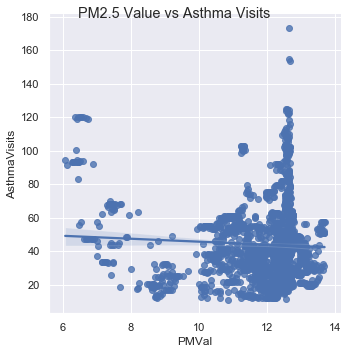

In [37]:
g = sns.lmplot(x="PMVal", y="AsthmaVisits", data=df_air_pm).fig.suptitle("PM2.5 Value vs Asthma Visits")


In [38]:
outcome_1, predictors_1= patsy.dmatrices('AsthmaVisits ~ PMVal', df_air_pm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.272
Date:                Wed, 18 Mar 2020   Prob (F-statistic):             0.0123
Time:                        14:00:27   Log-Likelihood:                -10304.
No. Observations:                2299   AIC:                         2.061e+04
Df Residuals:                    2297   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.4772      4.198     12.978      0.0

If we look at the OLS regression results in the cell above, the PM2.5 value explains about 0.3% of the variation in Asthma Visits for this dataset. Since the P-value associated with the F-statistic is less than our significance value of 0.05, we can reject the null hypothesis that PM2.5 value has no effect on Asthma visits for this subset of data. The coefficient of the PM2.5 value is about -0.88 so every additional increase in the PM2.5 value, there is a -0.88 decrease in the number of Asthma-related ER visits for this subset of data. 

We also created an OLS model taking into account income to see if it was a confounding variable in our results. As you can see in the cell below, it increased the R-squared value to 0.281. In other words, income accounts for about 28% of the variation in Asthma Visits for the entire dataset and PM2.5 values accounts for 0.3%. Since the P-value associated with the F-statistic is less than our significance value, we assume that it may be possible to reject the null hypothesis that the PM2.5 value and income has no effect on Asthma visits for the entire dataset. The coefficient of the PM2.5 value is about -2.17 so every additional increase in the PM2.5 value, there is a -2.17 decrease in the number of Asthma-related ER visits for this dataset. 

When taking into account income, there is about a -0.0004 decrease in the number of Asthma-related ER visits for every dollar increase. However, since the condition number is large, it suggests that there may be a correlation between the two predictor variables. Therefore, the results may not be statistically significant and it may not be possible to reject the null hypothesis in this case.

In [39]:
outcome_1, predictors_1= patsy.dmatrices('AsthmaVisits ~ PMVal+Income', df_air_pm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     447.8
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          6.29e-165
Time:                        14:00:27   Log-Likelihood:                -9928.3
No. Observations:                2299   AIC:                         1.986e+04
Df Residuals:                    2296   BIC:                         1.988e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.5667      3.789     24.434      0.0

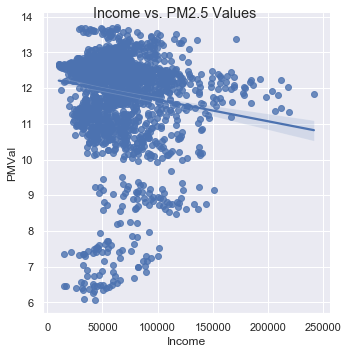

In [40]:
g = sns.lmplot(x="Income", y="PMVal", data=df_air_pm, y_jitter=.03).fig.suptitle("Income vs. PM2.5 Values")


We decided to determine if there is a correlation between income and PM2.5 values in order to test for multicollinearity. Based off the scatterplot above and the condition number being large when taken into account together, we believed there was enough evidence of correlation between the income and PM2.5 variables to not view them as statistically significant when taken into account together. 

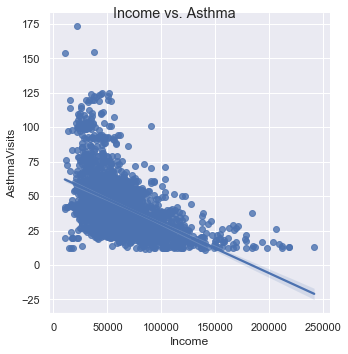

In [41]:
g = sns.lmplot(x="Income", y="AsthmaVisits", data=df_air_pm, y_jitter=.03).fig.suptitle("Income vs. Asthma")

In order to see if there is a relationship between Asthma Visits and Income alone, we decided to plot Income against Asthma visits as seen above. We were able to detect negative correlation in the scatterplot. For this dataset, it appears that as income increases, asthma visits generally decrease. 

In [72]:
outcome_2, predictors_2= patsy.dmatrices('AsthmaVisits ~ Income', df_air_pm)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     825.1
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          2.72e-155
Time:                        14:11:41   Log-Likelihood:                -9954.1
No. Observations:                2299   AIC:                         1.991e+04
Df Residuals:                    2297   BIC:                         1.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.9000      0.853     77.290      0.0

As we can tell from the OLS regression results above, income explains about 26.4% of the variation in Asthma visits. Since the F-statistic is less than our significance value, we can reject the null hypothesis that income does not have an effect on asthma visits. By the coefficient value, for every increase in income, there is a -0.0004 decrease in asthma visits. Therefore, we can conclude that there appears to be a negative correlation between income and asthma visits. 

Next, we decided to create a heatmap of our data in order to determine if there was a geospatial reason for the wide variety of datapoints within the PM2.5 values. First, we used a weighted heatmap to determine if certain areas had greater PM2.5 values than others. As you can see from the heatmap, there is a large amount of PM2.5 in Downtown Los Angeles near the neighborhoods of Wilshire Center, Koreatown, Angelino Heights, East Hollywood, and Pico Union.

In [73]:
#Heat map graphing PM2.5 values in Los Angeles
latitude = df_air_pm['x-coord']
longitude = df_air_pm['y-coord']
weights = df_air_pm['PMVal']

max_amount = float(weights.max())

hmap = folium.Map(location=[34.0654, -118.3004], zoom_start=12, )

hm_wide = HeatMap( list(zip(latitude, longitude, weights)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=12, blur=20, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)

Since we noticed certain subsets of the data were related to a varying relationship between the PM2.5 values and Asthma Visits, we then 
decided to split up the main dataset into smaller subsets. The four groups consisted of areas with PM2.5 values less than or equal to 10, greater than 10 and less than or equal to 12, greater than 12 and less than or equal to 13, and finally all PM2.5 values greater than 13. Then we plotted these groups against the number of asthma visits, performed an OLS regression on each, and added a heatmap to detect which areas of Los Angeles that they represented. We chose these groups because we believe based on the scatterplot of the data that it represents specific trends in the data.

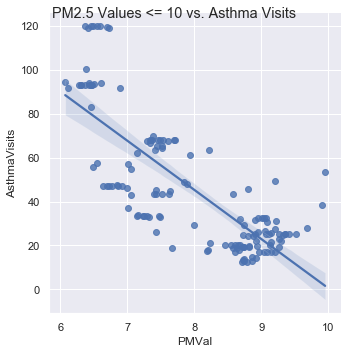

In [74]:
df_PMLow_skew = df_air_pm[df_air_pm['PMVal'] <= 10]
g = sns.lmplot(x="PMVal", y="AsthmaVisits", data=df_PMLow_skew).fig.suptitle('PM2.5 Values <= 10 vs. Asthma Visits')


Our null hypothesis is that the PM2.5 values have no effect on the number of Asthma-related ER visits for PM2.5 values less than or equal to 10. For the subset of the data where the PM2.5 value is less than 10, there is a negative relationship between PM2.5 values and Asthma visits. In other words, the increase in PM2.5 leads to a decrease in Asthma-related ER visits for this subset of data. To further explore this relationship, we used OLS regression in the cells below. 

In [75]:
outcome_1, predictors_1= patsy.dmatrices('AsthmaVisits ~ PMVal', df_PMLow_skew)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           1.38e-31
Time:                        14:13:57   Log-Likelihood:                -623.98
No. Observations:                 144   AIC:                             1252.
Df Residuals:                     142   BIC:                             1258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    224.7402     11.820     19.014      0.0

If we look at the OLS regression results, the PM2.5 value explains about 61.9% of the variation in Asthma Visits for this subset of the data. Since the P-value associated with the F-statistic is less than our significance value, we can reject the null hypothesis that PM2.5 value has no effect on Asthma visits for this subset of data. The coefficient of the PM2.5 value is about -22.42 so every additional increase in the PM2.5 value, there is a -22.42 decrease in the number of Asthma-related ER visits for this subset of data. 

In [76]:
#Heat map graphing PM2.5 values in Los Angeles

latitude = df_PMLow_skew['x-coord']
longitude = df_PMLow_skew['y-coord']
weights3 = df_PMLow_skew['PMVal']
max_amount = float(weights.max())
hmap = folium.Map(location=[34.3917, -118.5426], zoom_start=10, )
hm_wide3 = HeatMap( list(zip(latitude, longitude, weights3)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=12, blur=20, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wide3)

We added the heatmap above to determine which geographic locations contained PM2.5 values less than or equal to 10. From our OLS
regression and the heatmap, we were able to determine that Santa Clarita, Palmdale, Quartz Hill, and Lancaster were neighborhoods within LA county
for which an increase in PM2.5 values is correlated with a decrease in asthma visits. It should be noted that Santa Clarita and Quartz Hill are the neighborhoods with the lowest mean of asthma visits but the highest means for incomes as shown below for these specific neighborhoods. 

In [77]:
#Determine mean number of asthma visits and incomes for neighborhoods with low PM2.5 values

SantaClaritaInc = df_air_pm[df_air_pm['Neighborhood']=='Santa Clarita'].mean().Income
SantaClaritaAs = df_air_pm[df_air_pm['Neighborhood']=='Santa Clarita'].mean().AsthmaVisits

PalmDaleInc = df_air_pm[df_air_pm['Neighborhood']=='Palmdale'].mean().Income
PalmDaleAs = df_air_pm[df_air_pm['Neighborhood']=='Palmdale'].mean().AsthmaVisits

LancasterInc = df_air_pm[df_air_pm['Neighborhood']=='Lancaster'].mean().Income
LancasterAs = df_air_pm[df_air_pm['Neighborhood']=='Lancaster'].mean().AsthmaVisits


QuartzHillInc = df_air_pm[df_air_pm['Neighborhood']=='Quartz Hill'].mean().Income
QuartzHillAs = df_air_pm[df_air_pm['Neighborhood']=='Quartz Hill'].mean().AsthmaVisits


print('Mean Asthma Visits of Santa Clarita  is: \t\t {:2.2f}'.format(SantaClaritaAs))
print('Mean Income of Santa Clarita  is: \t\t\t {:2.2f}'.format(SantaClaritaInc))
print('\n')

print('Mean Asthma Visits of Palmdale  is: \t\t\t {:2.2f}'.format(PalmDaleAs))
print('Mean Income of Palmdale  is: \t\t\t\t {:2.2f}'.format(PalmDaleInc))
print('\n')


print('Mean Asthma Visits of Lancaster  is: \t\t\t {:2.2f}'.format(LancasterAs))
print('Mean Income of Lancaster  is: \t\t\t\t {:2.2f}'.format(LancasterInc))
print('\n')


print('Mean Asthma Visits of Quartz Hill  is: \t\t\t {:2.2f}'.format(QuartzHillAs))
print('Mean Income of Quartz Hill  is: \t\t\t {:2.2f}'.format(QuartzHillInc))
print('\n')



Mean Asthma Visits of Santa Clarita  is: 		 22.04
Mean Income of Santa Clarita  is: 			 89127.83


Mean Asthma Visits of Palmdale  is: 			 55.38
Mean Income of Palmdale  is: 				 53910.88


Mean Asthma Visits of Lancaster  is: 			 88.04
Mean Income of Lancaster  is: 				 47874.81


Mean Asthma Visits of Quartz Hill  is: 			 45.08
Mean Income of Quartz Hill  is: 			 73951.50




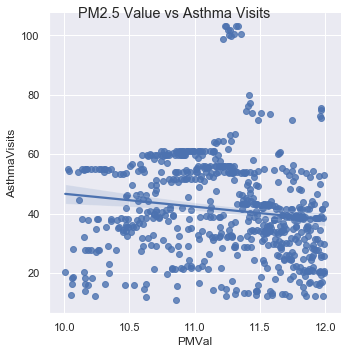

In [48]:
df_PMHigh_skew = df_air_pm[df_air_pm['PMVal'] > 10]
df_PMHigh_skew = df_PMHigh_skew[df_PMHigh_skew['PMVal'] <= 12]

g = sns.lmplot(x="PMVal", y="AsthmaVisits", data=df_PMHigh_skew, y_jitter=0.01).fig.suptitle("PM2.5 Value vs Asthma Visits")


We further split the data into another subset with PM2.5 values greater than 10 and less than or equal to 12. Our null hypothesis is that the PM2.5 values have no effect on the number of Asthma-related ER visits for this subset. For this subset, there is a small negative relationship between PM2.5 values and Asthma visits. In other words, the increase in PM2.5 leads to a decrease in Asthma-related ER visits for this subset of data. To further explore this relationship, we used OLS regression in the cell below. 

In [78]:
outcome_3, predictors_3= patsy.dmatrices('AsthmaVisits ~ PMVal', df_PMHigh_skew)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.02
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           0.000560
Time:                        14:15:22   Log-Likelihood:                -2737.3
No. Observations:                 649   AIC:                             5479.
Df Residuals:                     647   BIC:                             5488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.0799     14.052      6.410      0.0

If we look at the OLS regression results, the PM2.5 value explains about 1.8% of the variation in Asthma Visits for this subset of the data. Since the P-value associated with the F-statistic is less than our significance value, we can reject the null hypothesis that PM2.5 value has no effect on Asthma visits for this subset of data. The coefficient of the PM2.5 value is about -4.34 so every additional increase in the PM2.5 value, there is a -4.34 decrease in the number of Asthma-related ER visits for this subset of data. We can determine from the small R-squared value that there is not a clear linear relationship between the two variables within this subset of data. 

In [81]:
#Heat map graphing PM2.5 values in Los Angeles

latitude = df_PMHigh_skew['x-coord']
longitude = df_PMHigh_skew['y-coord']
weightsHigh = df_PMHigh_skew['PMVal']
max_amount = float(weights.max())
hmap = folium.Map(location=[33.9617, -118.3531], zoom_start=10, )
hm_wide3 = HeatMap( list(zip(latitude, longitude, weightsHigh)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=12, blur=20, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wide3)

We added the heatmap above to determine which geographic locations contained PM2.5 values greater than 10 and less than or equal to 12. From our OLS
regression and the heatmap, we were able to determine that there were several areas
for which an increase in PM2.5 values is correlated with a decrease in asthma visits within this dataset. The cities with the highest PM2.5 values were North Hollywood, Burbank, Long Beach, Lomita, San Pedro, and Panorama City.

In [84]:
#Determine mean number of asthma visits and incomes for neighborhoods with medium PM2.5 values

BurbankInc = df_air_pm[df_air_pm['Neighborhood']=='Burbank'].mean().Income
BurbankAs = df_air_pm[df_air_pm['Neighborhood']=='Burbank'].mean().AsthmaVisits

NorthHollywoodInc = df_air_pm[df_air_pm['Neighborhood']=='North Hollywood'].mean().Income
NorthHollywoodAs = df_air_pm[df_air_pm['Neighborhood']=='North Hollywood'].mean().AsthmaVisits

LomitaInc = df_air_pm[df_air_pm['Neighborhood']=='Lomita'].mean().Income
LomitaAs  = df_air_pm[df_air_pm['Neighborhood']=='Lomita'].mean().AsthmaVisits

LongBeachInc = df_air_pm[df_air_pm['Neighborhood']=='Long Beach'].mean().Income
LongBeachAs = df_air_pm[df_air_pm['Neighborhood']=='Long Beach'].mean().AsthmaVisits

SanPedroInc = df_air_pm[df_air_pm['Neighborhood']=='San Pedro'].mean().Income
SanPedroAs = df_air_pm[df_air_pm['Neighborhood']=='San Pedro'].mean().AsthmaVisits

PanaInc = df_air_pm[df_air_pm['Neighborhood']=='Panorama City'].mean().Income
PanaAs = df_air_pm[df_air_pm['Neighborhood']=='Panorama City'].mean().AsthmaVisits


print('Mean Asthma Visits of Burbank  is: \t\t {:2.2f}'.format(BurbankAs))
print('Mean Income of Burbank  is: \t\t\t {:2.2f}'.format(BurbankInc))
print('\n')

print('Mean Asthma Visits of North Hollywood is: \t {:2.2f}'.format(NorthHollywoodAs))
print('Mean Income of North Hollywood  is: \t\t {:2.2f}'.format(NorthHollywoodInc))
print('\n')

print('Mean Asthma Visits of Lomita is: \t\t {:2.2f}'.format(LomitaAs))
print('Mean Income of Lomita  is: \t\t\t {:2.2f}'.format(LomitaInc))
print('\n')

print('Mean Asthma Visits of San Pedro is: \t\t {:2.2f}'.format(SanPedroAs))
print('Mean Income of San Pedro  is: \t\t\t {:2.2f}'.format(SanPedroInc))
print('\n')

print('Mean Asthma Visits of Panorama City is: \t {:2.2f}'.format(PanaAs))
print('Mean Income of Panorama City  is: \t\t {:2.2f}'.format(PanaInc))
print('\n')

print('Mean Asthma Visits of Long Beach  is: \t\t {:2.2f}'.format(LongBeachAs))
print('Mean Income of Long Beach  is: \t\t\t {:2.2f}'.format(LongBeachInc))
print('\n')

Mean Asthma Visits of Burbank  is: 		 34.71
Mean Income of Burbank  is: 			 68055.17


Mean Asthma Visits of North Hollywood is: 	 41.60
Mean Income of North Hollywood  is: 		 43423.50


Mean Asthma Visits of Lomita is: 		 33.86
Mean Income of Lomita  is: 			 59873.00


Mean Asthma Visits of San Pedro is: 		 45.27
Mean Income of San Pedro  is: 			 61217.32


Mean Asthma Visits of Panorama City is: 	 61.00
Mean Income of Panorama City  is: 		 40884.94


Mean Asthma Visits of Long Beach  is: 		 57.98
Mean Income of Long Beach  is: 			 57601.97




We further split the data into our smallest interval yet. We chose the data with PM2.5 values between 12 and 13 because based off our normal distribution graph of PM2.5 values, the majority of the PM2.5 values lie within this range. We wanted to determine what areas were included within this range as well as if it had any correlation with asthma visits.

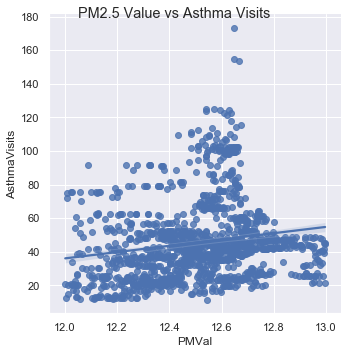

In [86]:
df_PMHigh_skew2 = df_air_pm[df_air_pm['PMVal'] > 12]
df_PMHigh_skew2 = df_PMHigh_skew2[df_PMHigh_skew2['PMVal'] < 13]

g = sns.lmplot(x="PMVal", y="AsthmaVisits", data=df_PMHigh_skew2, y_jitter=.03).fig.suptitle("PM2.5 Value vs Asthma Visits")


In [88]:
outcome_1, predictors_1= patsy.dmatrices('AsthmaVisits ~ PMVal', df_PMHigh_skew2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     43.12
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           7.28e-11
Time:                        14:29:38   Log-Likelihood:                -6227.9
No. Observations:                1375   AIC:                         1.246e+04
Df Residuals:                    1373   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -189.1944     35.776     -5.288      0.0

If we look at the OLS regression results above, the PM2.5 values explains about 3% of the variation in Asthma Visits for this subset of the data. The coefficient of the PM2.5 value is about 18.77 so every additional increase in the PM2.5 value, there is a 18.77 increase in the number of Asthma-related ER visits for this subset of data. Since the P-value associated with the F-statistic is less than our significance value, we can reject the null hypothesis that PM2.5 value has no effect on Asthma visits for this subset of data. It should be noted that this subset of data contains the highest amount of datapoints and therefore, covers the most cities in Los Angeles county out of any of the other subsets.

In [90]:
#Heat map graphing PM2.5 values in Los Angeles

latitude = df_PMHigh_skew2['x-coord']
longitude = df_PMHigh_skew2['y-coord']
weightsHigh2 = df_PMHigh_skew2['PMVal']
max_amount2 = float(weightsHigh2.max())
hmap = folium.Map(location=[34.0654, -118.3004], zoom_start=12, )
hm_wideMax = HeatMap( list(zip(latitude, longitude, weightsHigh2)),
                   min_opacity=0.2,
                   max_val=max_amount2,
                   radius=12, blur=20, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wideMax)

We added the heatmap above to determine which geographic locations contained PM2.5 values greater than 12 and less than 13. Since the majority of the PM2.5 values are within the 12-13 range, it covered the majority of Los Angeles county. Even though there was a relationship betwen increasing PM2.5 values leading to an increased number of cases, it was statistically significant but it only explained about 3% in the variation of asthma visits. The areas with the highest PM2.5 values included Wilshire Center and Westlake, both located near Downtown LA. 

In [55]:
#Determine mean number of asthma visits and incomes for neighborhoods with medium PM2.5 values

WilshireInc = df_air_pm[df_air_pm['Neighborhood']=='Mid-Wilshire'].mean().Income
WilshireAs = df_air_pm[df_air_pm['Neighborhood']=='Mid-Wilshire'].mean().AsthmaVisits

WestlakeInc = df_air_pm[df_air_pm['Neighborhood']=='Westlake'].mean().Income
WestlakeAs = df_air_pm[df_air_pm['Neighborhood']=='Westlake'].mean().AsthmaVisits


print('Mean Asthma Visits of Wilshire Center  is: \t {:2.2f}'.format(WilshireAs))
print('Mean Income of Wilshire Center  is: \t\t {:2.2f}'.format(WilshireInc))
print('\n')

print('Mean Asthma Visits of Westlake  is: \t\t {:2.2f}'.format(WestlakeAs))
print('Mean Income of Westlake  is: \t\t\t {:2.2f}'.format(WestlakeInc))
print('\n')

Mean Asthma Visits of Wilshire Center  is: 	 31.46
Mean Income of Wilshire Center  is: 		 63297.91


Mean Asthma Visits of Westlake  is: 		 39.57
Mean Income of Westlake  is: 			 29112.63




Finally, our last subset of the data included PM2.5 values greater than or equal to 13. As we can see from the plot below, there appears to be a positive correlation between PM2.5 values on asthma visits. However, it should be noted that there appear to be outliers. 

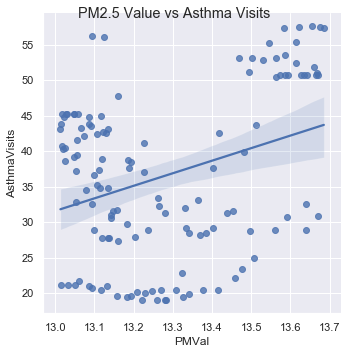

In [97]:
df_PMHigh_skew3 = df_air_pm[df_air_pm['PMVal'] >= 13]

g = sns.lmplot(x="PMVal", y="AsthmaVisits", data=df_PMHigh_skew2, y_jitter=.03).fig.suptitle("PM2.5 Value vs Asthma Visits")


In [98]:
outcome_1, predictors_1= patsy.dmatrices('AsthmaVisits ~ PMVal', df_PMHigh_skew3)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           AsthmaVisits   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           0.000141
Time:                        14:41:17   Log-Likelihood:                -499.86
No. Observations:                 131   AIC:                             1004.
Df Residuals:                     129   BIC:                             1009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -198.0153     59.810     -3.311      0.0

If we look at the OLS regression results above, the PM2.5 values explains about 10.7% of the variation in Asthma Visits for this subset of the data. The coefficient of the PM2.5 value is about 17.66 so every additional increase in the PM2.5 value, there is a 17.66 increase in the number of Asthma-related ER visits for this subset of data. Since the P-value associated with the F-statistic is less than our significance value, we can reject the null hypothesis that PM2.5 value has no effect on Asthma visits for this subset of data. It should be noted that this subset of data contains a smaller amont of datapoints.

In [109]:
#Heat map graphing PM2.5 values greater than or equal to 13 in Los Angeles

latitude = df_PMHigh_skew3['x-coord']
longitude = df_PMHigh_skew3['y-coord']
weightsHigh2 = df_PMHigh_skew3['PMVal']
max_amount2 = float(weightsHigh2.max())
hmap = folium.Map(location=[34.0686, -117.9390], zoom_start=11, )
hm_wideMax = HeatMap( list(zip(latitude, longitude, weightsHigh2)),
                   min_opacity=0.2,
                   max_val=max_amount2,
                   radius=12, blur=20, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wideMax)

As we can see from the heatmap above, the cities with PM2.5 values greater than or equal to 13 are congregated all in areas east of downtown Los Angeles. Many of the cities reside in the San Gabriel Valley and the nearby Pomona Valley, which are historically known to have higher temperatures than the other areas of LA county. The cities with the highest PM2.5 values are Covina, West Covina, La Puente, Walnut, and Pomona.

It should be noted that the continued correlation between higher income and less asthma visits is shown in the cell below for the selected cities within this subset of the data.

In [108]:
#Determine mean number of asthma visits and incomes for neighborhoods with medium PM2.5 values

CovinaInc = df_air_pm[df_air_pm['Neighborhood']=='Covina'].mean().Income
CovinaAs = df_air_pm[df_air_pm['Neighborhood']=='Covina'].mean().AsthmaVisits

WestCovinaInc = df_air_pm[df_air_pm['Neighborhood']=='West Covina'].mean().Income
WestCovinaAs = df_air_pm[df_air_pm['Neighborhood']=='West Covina'].mean().AsthmaVisits

LaPuenteInc = df_air_pm[df_air_pm['Neighborhood']=='La Puente'].mean().Income
LaPuenteAs  = df_air_pm[df_air_pm['Neighborhood']=='La Puente'].mean().AsthmaVisits

WalnutInc = df_air_pm[df_air_pm['Neighborhood']=='Walnut'].mean().Income
WaltnutAs = df_air_pm[df_air_pm['Neighborhood']=='Walnut'].mean().AsthmaVisits

PomonaInc = df_air_pm[df_air_pm['Neighborhood']=='Pomona'].mean().Income
PomonaAs = df_air_pm[df_air_pm['Neighborhood']=='Pomona'].mean().AsthmaVisits


print('Mean Asthma Visits of Covina  is: \t\t {:2.2f}'.format(CovinaAs))
print('Mean Income of Covina  is: \t\t\t {:2.2f}'.format(CovinaInc))
print('\n')

print('Mean Asthma Visits of West Covina is: \t\t {:2.2f}'.format(WestCovinaAs))
print('Mean Income of West Covina  is: \t\t {:2.2f}'.format(WestCovinaInc))
print('\n')

print('Mean Asthma Visits of La Puente is: \t\t {:2.2f}'.format(LaPuenteAs))
print('Mean Income of La Puente  is: \t\t\t {:2.2f}'.format(LaPuenteInc))
print('\n')

print('Mean Asthma Visits of Walnut is: \t\t {:2.2f}'.format(WaltnutAs))
print('Mean Income of Walnut  is: \t\t\t {:2.2f}'.format(WalnutInc))
print('\n')

print('Mean Asthma Visits of Pomona is: \t\t {:2.2f}'.format(PomonaAs))
print('Mean Income of Pomona  is: \t\t\t {:2.2f}'.format(PomonaInc))
print('\n')


Mean Asthma Visits of Covina  is: 		 43.85
Mean Income of Covina  is: 			 60414.20


Mean Asthma Visits of West Covina is: 		 33.79
Mean Income of West Covina  is: 		 72894.00


Mean Asthma Visits of La Puente is: 		 43.03
Mean Income of La Puente  is: 			 53640.38


Mean Asthma Visits of Walnut is: 		 19.89
Mean Income of Walnut  is: 			 108218.57


Mean Asthma Visits of Pomona is: 		 51.33
Mean Income of Pomona  is: 			 50446.54




Since it was hard to establish a linear relationship for our entire dataset between PM2.5 values and asthma visits given our respective datasets, we decided to model our data using Machine Learning models. We chose the subset of our data with the most datapoints, which includes the subset of PM2.5 values greater than 12 and less than 13. We used the K-nearest neighbors approach. The only predictor we chose for asthma visits was PM2.5 values because income and PM2.5 values seem to be correlated.  

In [121]:
# get data for attributes model
model_data = df_PMHigh_skew2[['PMVal', 'AsthmaVisits', 'Income', 'Geometry']].dropna()
model_data = df_PMHigh_skew2[['PMVal', 'AsthmaVisits', 'Income', 'Geometry']]

# specify predictors (X) and outcome (y)
Xnames = ['PMVal']
X = model_data[Xnames].values
X = X.astype(float)
y = np.log(model_data['AsthmaVisits'].values)


In [122]:
# get spatial coordinates
coordinates = np.vstack(model_data.Geometry.apply(lambda p: np.hstack(p.xy)).values)

In [123]:
# specify training and test set
shuffle = np.random.permutation(len(y))
num = int(0.8*len(shuffle))
train, test = shuffle[:num],shuffle[num:]

We choose to use three models: spatial, attribute, and both.

In [124]:
import sklearn.neighbors as skn

# spatial
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=100)
spatial = KNNR.fit(coordinates[train,:],
                  y[train])
# attribute
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=100)
attribute = KNNR.fit(X[train,:],
                    y[train])
# both
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=100)
both = KNNR.fit(np.hstack((coordinates,X))[train,:],
                y[train])


In [125]:
# generate predictions in the training set
sp_ypred_train =  spatial.predict(coordinates[train,:])  # spatial
att_ypred_train = attribute.predict(X[train,:])          # attribute
both_ypred_train = both.predict(np.hstack((X,coordinates))[train,:]) # combo

As you can see in the cell below, the explained variance score shows that there is overfitting due to the high explained variance score for both the spatial and attribute models. It is not likely that both models can predict greater than 99% of asthma visits. 

In [127]:
# variance explained in training data
import sklearn.metrics as skm
from sklearn.metrics import mean_squared_error, r2_score

(skm.explained_variance_score(y[train,], sp_ypred_train),
 skm.explained_variance_score(y[train,], att_ypred_train),
 skm.explained_variance_score(y[train,], both_ypred_train))

# Since attribute and spatial are both 1.0, likely due to overfitting

(0.9999996468020164, 1.0, 6.915771599835807e-08)

As you can see in the graph below, the model predicted the majority of asthma visits on the training dataset using the attribute predictor. 

Text(0.5, 1.0, 'Reported Cases of Asthma Visits vs. Predicted Cases of Asthma Visits')

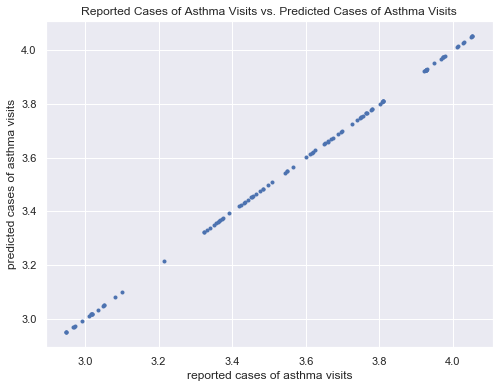

In [128]:
# take a look at predictions
plt.plot(y[train,], att_ypred_train, '.')
plt.xlabel('reported cases of asthma visits')
plt.ylabel('predicted cases of asthma visits');
plt.title('Reported Cases of Asthma Visits vs. Predicted Cases of Asthma Visits')


In [129]:
# generate predictions in the test set
sp_ypred =  spatial.predict(coordinates[test,:])
att_ypred = attribute.predict(X[test,:])
both_ypred = both.predict(np.hstack((X,coordinates))[test,:])

We then made predictions using the test dataset for all three models. However, the explained variance scores were much lower than the training dataset. Therefore, this large difference in explained variance scores is likely due to overfitting.

In [130]:
(skm.explained_variance_score(y[test,], sp_ypred),
 skm.explained_variance_score(y[test,], att_ypred),
 skm.explained_variance_score(y[test,], both_ypred))

(0.3876539781289373, 0.2358461156203675, 6.667614149691303e-08)

Given the testing dataset, the attribute model was not able to make accurate predictions for asthma visits. It only predicted asthma visits about 23.6% of the time using the attribute model.

Text(0.5, 1.0, 'Reported Cases of Asthma Visits vs. Predicted Cases of Asthma Visits')

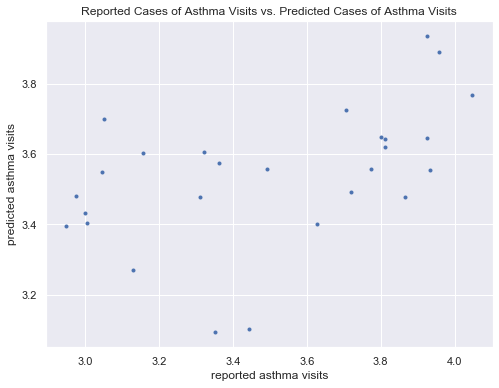

In [131]:
# take a look at predictions
plt.plot(y[test,], att_ypred, '.')
plt.xlabel('reported asthma visits')
plt.ylabel('predicted asthma visits');
plt.title('Reported Cases of Asthma Visits vs. Predicted Cases of Asthma Visits')

As we can see from the look into our X and y values in the two cells below, several variables are close together or exactly the same in value. This may allow the model to analyze these trends and make accurate predictions using the training dataset. However, in the testing dataset it causes an issue.

In [132]:
X

array([[13.34178688],
       [13.37010208],
       [13.4974922 ],
       [13.23791715],
       [13.3333998 ],
       [13.33074179],
       [13.09905286],
       [13.14781969],
       [13.05189827],
       [13.12866119],
       [13.18574435],
       [13.12148693],
       [13.40279542],
       [13.36496587],
       [13.26169179],
       [13.2638076 ],
       [13.43859402],
       [13.40247179],
       [13.45271134],
       [13.38518774],
       [13.48131122],
       [13.50746025],
       [13.5464487 ],
       [13.56099018],
       [13.63962703],
       [13.59258595],
       [13.6395195 ],
       [13.66980123],
       [13.61559199],
       [13.58405903],
       [13.52982412],
       [13.58721852],
       [13.56278243],
       [13.49539923],
       [13.4168138 ],
       [13.46773594],
       [13.50125477],
       [13.57323282],
       [13.58740391],
       [13.62239034],
       [13.67564026],
       [13.65933186],
       [13.6548226 ],
       [13.6854318 ],
       [13.66820316],
       [13

In [133]:
y

array([3.35014781, 3.33936198, 3.35654863, 3.36608434, 3.37389042,
       3.46427565, 3.3634834 , 3.45150335, 3.61747349, 3.75031441,
       3.65941787, 3.75563952, 3.62627514, 3.4982828 , 3.5077942 ,
       3.47413801, 3.4429785 , 3.371276  , 3.45422655, 3.34990409,
       3.68620518, 3.21465931, 4.01030846, 3.3653687 , 3.36149726,
       3.4229636 , 3.48260752, 3.43209448, 4.01383802, 4.04854197,
       3.96635682, 3.97913721, 3.97292994, 3.9343956 , 3.74934976,
       3.9726686 , 3.97292994, 3.92671455, 3.92671455, 4.05145895,
       4.05071845, 3.94989893, 4.05248036, 4.04796943, 3.93059358,
       3.92671455, 3.92671455, 3.92671455, 3.92671455, 3.92651501,
       3.92671455, 2.94916464, 2.96750753, 2.97525836, 2.99048186,
       3.09945605, 3.77668461, 3.92152518, 3.0189604 , 3.0161331 ,
       3.15564431, 3.00947057, 3.0189604 , 3.01658646, 3.0189604 ,
       3.00454646, 2.94916464, 2.96909159, 2.94916464, 3.12850717,
       2.94916464, 3.00057418, 2.97246052, 3.44315464, 3.71877

We also want to take a look at the neighborhoods that caused a skew in both our previous Normal Distributions plots for asthma count. As we can see in the heatmap below, the areas with the highest rates of asthma-related ER visits are located mainly in South Los Angeles, Long Beach, and Lancaster. 


It should be noted that the cities near downtown Los Angeles are closely spaced to major hospitals, such as LAC+USC medical center, which is one of the largest hospitals within LA County. This may skew the rates for the number of asthma visits due to the large percentage of patients that larger hospitals see. It is also interesting to note that Lancaster is located near Edwards Air Force Base, including an airfield and an air force plant. Lancaster is also located next to three regional airports. It should be noted that Lancaster has a higher population than Quartz Hill and Palmdale, which may skew the rates of asthma visits for those cities in comparison to Lancaster. 

In [135]:
lats = df_skew_neighborhoods_asth['x-coord']
longs = df_skew_neighborhoods_asth['y-coord']
PMVAL = df_skew_neighborhoods_asth['Count']

max_amount = float(PMVAL.max())

h_map = folium.Map(location=[34.41387, -118.55121], zoom_start=9, )

hm = HeatMap( list(zip(lats, longs, PMVAL)),
                   min_opacity=0.3,
                   max_val=max_amount,
                   radius=20, blur=20, 
                   max_zoom=1, 
                 )

h_map.add_child(hm)

# Ethics & Privacy

DATA PERMISSIONS and CONCERNS:

All of our datasets came from public datasets made by either Universities or public government programs such as the EPA and the U.S. Census. We have no restrictions in using these particular datasets. Since these datasets were all from reputable organizations there were no real concerns with the data itself. However, for the USC datasets we were worried about the location data showing exact places of people’s houses, but after checking this concern was averted because it did not show anybody’s home just general locations.


Potential Biases:

We believe that it is possible that people who are of lower income may be affected more by asthma however we also believe that these datasets do not cover them as thoroughly. Because, at least in the US where these datasets were composed we have many people who can’t afford healthcare.


In order to relive the issue of the potential income bias we have tried to include the median income of households in Los Angeles in our analysis. We made an effort to analyze how income could be a factor. We also included income data from multiple sources in order to be more accurate just to be safe.  


# Conclusion & Discussion

Although we felt air pollution will have a strong effect on asthma and cause it to increase in general, it seems there are a lot of confounding variables that cause asthma so there isn’t a strong correlation between these two variables in the datasets that we used. For one subset of the data, we were able to find a negative correlation between PM2.5 values and asthma-related ER visits. This may be due to the fact that areas with higher PM2.5 values have lower levels of income. For other subsets of the data, we were able to find a small positive correlation. However, it only explained a small variation of the rates of asthma visits. We were also able to find a slight negative correlation between income and PM2.5 values so that as income decreases, PM2.5 values increase. After we attempted linear regression, we attempted to model the datasets via machine learning. However, we also believe there was clear overfitting due to high variance scores for both the spatial and attribute models. This might be due to the similarity of PM2.5 values being tightly clustered together in the range of 10-14. 

We believe that our datasets also caused a limitation to our analysis since we could not access any datasets for asthma other than ER-related visits. Since ER-related visits are restricted to more severe cases, we were unable to find complete information on the total list of all asthma cases in Los Angeles since it would be a violation of HIPAA (Health Insurance Portability and Accountability Act) for hospitals to publicly publish that information. Another limitation is we only looked into PM2.5 values and did not consider ozone levels and carbon monoxide, which also play a role in air pollution. Also, we only took into account one confounding variable which was income, and although we discussed other confounding variables such as population and smoking, we were unable to find adequate datasets that were organized by their geographic coordinates in Los Angeles for these variables.


We did find a negative correlation between Income and Asthma Visits. We believe this can have an impact on people living in poverty. However, since most of the data that we looked into is from 2014, we are not sure of how relevant this would be to society today. We still believe that people of lower income will suffer more from higher air pollution but there is no strong claim that this will result in an increase in asthma cases in these populations based off the results that we found. It is especially important for people who have asthma that we do not come to incorrect conclusions or create false causality within our analysis. They should receive accurate information in order for them to maintain a healthy lifestyle. There is definitely more research that can be done on this topic to provide better conclusions.


# Team Contributions

We decided to work on the entire project together. We managed to meet up 2-3 times a week and worked on Jupyter Notebook by one sharing screen that everyone contributed to.